In [1]:
import networkx as nx
import numpy as np
import scipy.stats
import pickle
%matplotlib inline

In [28]:
def KLD_entropy(graph, characteristic, characteristic_random_logprob):
    degree_total_g = sum(graph.degree().values())
    n = len(graph.nodes())
    p = float(degree_total_g) / float(n) / float(n-1)
    random_graph = nx.erdos_renyi_graph(n, p)
    a = characteristic(graph)
    b = characteristic_random_logprob(n, p)
    a_non_zero = a[np.nonzero(a)]
    S = 0
    S += np.sum(np.multiply(a_non_zero, np.log(a_non_zero)))
    S += np.sum(np.multiply(-a, b))
    return S

In [73]:
def KLD_entropy_laplacian(graph, characteristic, characteristic_random_log):
    degree_total_g = sum(graph.degree().values())
    n = len(graph.nodes())
    p = float(degree_total_g) / float(n) / float(n-1)
    random_graph = nx.erdos_renyi_graph(n, p)
    a = characteristic(graph)
    b = characteristic_random_log(random_graph)
    a_non_zero = a[np.nonzero(a)]
    S = 0
    S += np.sum(np.multiply(a_non_zero, np.log(a_non_zero)))
    S += np.sum(np.multiply(-a, b))
    return S

In [30]:
def degree_distribution(graph):
    a = np.bincount(graph.degree().values())
    a.resize(len(graph.nodes()))
    a = a.astype(np.float)
    a = np.divide(a, np.sum(a))
    return a

In [31]:
def degree_distribution_random_logprob(n, p):
    pdf = []
    for i in xrange(n):
        pdf.append(scipy.stats.binom.logpmf(i, n-1, p))
        
    pdf = np.array(pdf)
    
    pdf[pdf == -np.inf] = np.iinfo(np.int).min
    
    return pdf

In [25]:
n = 30
K_5 = nx.complete_graph(n)
maze=nx.sedgewick_maze_graph()
k_reg = nx.random_regular_graph(n/2, n)
bull = nx.bull_graph()
small_world = nx.newman_watts_strogatz_graph(n, 2, 0.1)

In [33]:
nx.laplacian_spectrum(small_world)

array([ -3.48063906e-16,   5.15363646e-02,   1.94031510e-01,
         2.59571692e-01,   3.22385147e-01,   4.00214083e-01,
         5.83196772e-01,   8.17136743e-01,   8.34523838e-01,
         1.07199275e+00,   1.18176545e+00,   1.38196601e+00,
         1.46439062e+00,   1.91380991e+00,   2.09147534e+00,
         2.38312101e+00,   2.44595670e+00,   2.74147163e+00,
         2.76634344e+00,   3.00000000e+00,   3.25373258e+00,
         3.38014595e+00,   3.53158383e+00,   3.61803399e+00,
         3.76961908e+00,   3.88328625e+00,   3.96848017e+00,
         4.25906268e+00,   4.82874192e+00,   5.60242453e+00])

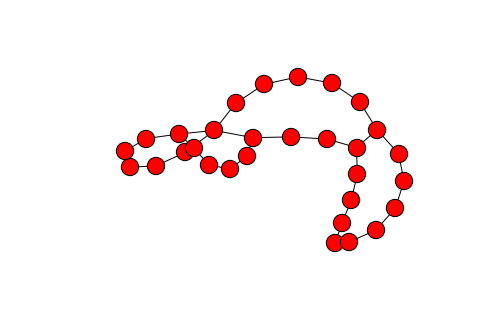

In [26]:
nx.draw(small_world)

In [ ]:
rg = nx.erdos_renyi_graph(n, 0.1)

In [32]:
KLD_entropy(small_world, degree_distribution, degree_distribution_random_logprob)

0.81889001684532958

In [65]:
def laplacian_spectrum_log(graph):
    a = nx.laplacian_spectrum(graph)
    a[a < 0] = np.finfo(np.float).tiny
    return np.log(nx.laplacian_spectrum(graph))

In [64]:
def laplacian_spectrum(graph):
    a = nx.laplacian_spectrum(graph)
    a[a < 0] = np.finfo(np.float).tiny
    return a

In [72]:
KLD_entropy_laplacian(small_world, laplacian_spectrum, laplacian_spectrum_log)

[  2.22507386e-308   5.15363646e-002   1.94031510e-001   2.59571692e-001
   3.22385147e-001   4.00214083e-001   5.83196772e-001   8.17136743e-001
   8.34523838e-001   1.07199275e+000   1.18176545e+000   1.38196601e+000
   1.46439062e+000   1.91380991e+000   2.09147534e+000   2.38312101e+000
   2.44595670e+000   2.74147163e+000   2.76634344e+000   3.00000000e+000
   3.25373258e+000   3.38014595e+000   3.53158383e+000   3.61803399e+000
   3.76961908e+000   3.88328625e+000   3.96848017e+000   4.25906268e+000
   4.82874192e+000   5.60242453e+000]
[ 1.          0.05153636  0.19403151  0.25957169  0.32238515  0.40021408
  0.58319677  0.81713674  0.83452384  1.07199275  1.18176545  1.38196601
  1.46439062  1.91380991  2.09147534  2.38312101  2.4459567   2.74147163
  2.76634344  3.          3.25373258  3.38014595  3.53158383  3.61803399
  3.76961908  3.88328625  3.96848017  4.25906268  4.82874192  5.60242453]


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log


nan

rg_sparse = nx.to_scipy_sparse_matrix(rg)
file_to_dump = open('random_graph_n1000_p1_sparse.pickle', 'w')
pickle.dump(rg_sparse, file_to_dump)
file_to_dump.close()